
# Flipkart iPhone SE Sentiment Analysis

In this project I will be taking a look at this Apple iPhone SE review and ratings dataset and doing a sentiment analysis on the data.
I am looking to gain insight on the overall customer sentiment of the iPhone SE and the keywords for positive, negative, and neutral sentiment.

The data I used is from [Kaggle](https://www.kaggle.com/kmldas/apple-iphone-se-reviews-ratings) and it is user ratings of the Apple iPhone SE from the website [Flipkart](https://www.flipkart.com/apple-iphone-se-black-128-gb/product-reviews/itma9285ccc6af28?pid=MOBFWQ6BHUEVZPXD).

If this were real data Apple could use this review data to gain valuable insight on the iPhone and answer questions like:
- What are the customers sentiment towards the iPhone SE?
- What features are mentioned in comments with positive sentiment?
- What features are mentioned in comments with negative sentiment?


### Let's start by importing the necessary packages for this project.

In [668]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re

%matplotlib inline


In [669]:
# Import data into pandas database and preview rows
df = pd.read_csv('APPLE_iPhone_SE.csv')

df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [670]:
# Grouping the data by ratings and counting the number of times each rating appears
ratings = df.groupby(['Ratings']).count()
ratings.drop(['Reviews'], axis=1, inplace=True)
ratings.rename(columns={'Comment': 'Count'}, inplace=True)

ratings

,Count
Ratings,
1,474
2,199
3,535
4,1717
5,6788


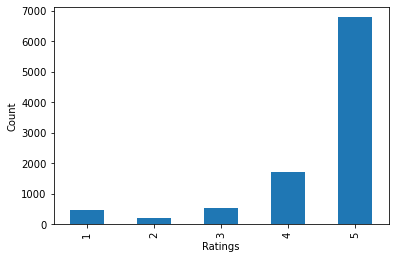

In [671]:
# Creating bar graph of Ratings count
ratings.plot(kind='bar', legend=False)
plt.ylabel('Count')
plt.show()

In [672]:
# Creating Column of percentages
ratings['Percentage'] = ratings['Count'].apply(
    lambda x: int(x/ratings.Count.sum() * 100))
ratings


,Count,Percentage
Ratings,,
1,474,4
2,199,2
3,535,5
4,1717,17
5,6788,69


- We can see that 69% of our reviews are 5/5 and 17% are 4/5 which mean 86% of the reviews gave a rating of 4/5 or above.
- 5% of reviewers gave a rating of 3/5.
- 6% of reviewers gave a rating of 2/5 or below.

Looking at the percentages gives us a better look at how the data is distributed. We can see that 86% gave a positve review and 11% gave a negative or neutral review.


In [673]:
# Getting rid of the neutral reviews and adding sentiment based on Ratings
df3 = df[df['Ratings'] != 3]

df3['Sentiment'] = df['Ratings'].apply(lambda x: 1 if x > 3 else -1)

df3


<ipython-input-673-80e591dfda1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sentiment'] = df['Ratings'].apply(lambda x: 1 if x > 3 else -1)


,Ratings,Comment,Reviews,Sentiment
0,5,Super!,Great camera for pics and videos Battery life ...,1
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,1
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",1
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,1
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,1
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,1
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",1
9710,5,Awesome,very niceREAD MORE,1
9711,5,Super!,Loving it as of now. Good Product .READ MORE,1


In [674]:
# Splitting dataframe into positive and negative sentiment
positive = df3[df3['Sentiment'] == 1]
negative = df3[df3['Sentiment'] == -1]

negative


,Ratings,Comment,Reviews,Sentiment
16,1,Unsatisfactory,Everything is fine of this mobile except batte...,-1
59,1,Terrible product,It’s not good product ...it’s cost is more qua...,-1
190,2,Bad quality,Fails to do basic things. I have this phone an...,-1
387,2,Moderate,Only good thing about this phone is its proces...,-1
396,2,Expected a better product,"It's an outdated very very tiny phone, with a ...",-1
...,...,...,...,...
9567,2,Could be way better,Battery doesn’t last for a day. I charged it i...,-1
9571,2,Poor Battery,It doesn't matter how the phone performs or ho...,-1
9579,2,Expected a better product,Its charing cable is faultyREAD MORE,-1
9605,2,Slightly disappointed,"Everything ok, Battery utterly failed. Don’t b...",-1


<AxesSubplot:xlabel='Sentiment'>

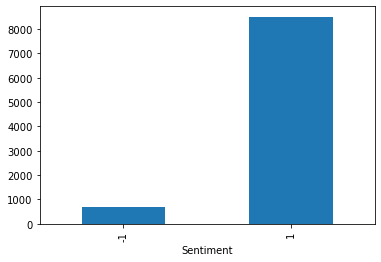

In [675]:
# Bar Graph of positive and negative sentiment
df4 = df3.drop(['Comment', 'Reviews'], axis=1)
df4.groupby(['Sentiment']).count().plot(kind='bar', legend=False)


In [676]:
# Split Comments and reviews
positive_review_sentences = []

negative_review_sentences = []

for word in positive['Reviews']:
    positive_review_sentences.append(word)

for word in negative['Reviews']:
    negative_review_sentences.append(word)


In [677]:
# Split words in Reviews into list
positive_lines = list()
for line in positive_review_sentences:
    words = line.split()
    for w in words:
        positive_lines.append(w)

negative_lines = list()
for line in negative_review_sentences:
    words = line.split()
    for w in words:
        negative_lines.append(w)


In [678]:
# Clean up data by removing punctuation with regex

positive_lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in positive_lines]

positive_lines2 = []

for word in positive_lines:
    if word != '':
        positive_lines2.append(word)


negative_lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in negative_lines]

negative_lines2 = []

for word in negative_lines:
    if word != '':
        negative_lines2.append(word)

negative_lines2


['Everything',
 'is',
 'fine',
 'of',
 'this',
 'mobile',
 'except',
 'battery',
 'Battery',
 'consumption',
 'at',
 '810',
 'Brightness',
 'inVideo',
 'call',
 'almost',
 '4',
 'reduction',
 'for',
 'every',
 '56',
 'mins',
 'Phone',
 'call',
 'almost',
 '1',
 'reduction',
 'for',
 'every',
 '45',
 'mins',
 'Which',
 'seems',
 'to',
 'be',
 'bit',
 'faster',
 'consumption',
 'First',
 'iPhone',
 'Im',
 'using',
 'Im',
 'not',
 'sure',
 'about',
 'regular',
 'battery',
 'consumption',
 'rate',
 'But',
 'this',
 'doesnt',
 'look',
 'nice',
 'to',
 'meREAD',
 'MORE',
 'Its',
 'not',
 'good',
 'product',
 'its',
 'cost',
 'is',
 'more',
 'quality',
 'is',
 'not',
 'good',
 'every',
 'time',
 'is',
 'hangoutbattery',
 'consumption',
 'is',
 'more',
 'at',
 'least',
 'half',
 'day',
 'also',
 'not',
 'get',
 'in',
 'finally',
 'my',
 'best',
 'suggestion',
 'is',
 'choose',
 'another',
 'oneREAD',
 'MORE',
 'Fails',
 'to',
 'do',
 'basic',
 'things',
 'I',
 'have',
 'this',
 'phone',
 'and'

In [679]:
# Use snowball stemmer to get the common stem of words
s_stemmer = SnowballStemmer(language='english')

positive_stem = []
for word in positive_lines2:
    positive_stem.append(s_stemmer.stem(word))

negative_stem = []
for word in negative_lines2:
    negative_stem.append(s_stemmer.stem(word))

negative_stem


['everyth',
 'is',
 'fine',
 'of',
 'this',
 'mobil',
 'except',
 'batteri',
 'batteri',
 'consumpt',
 'at',
 '810',
 'bright',
 'invideo',
 'call',
 'almost',
 '4',
 'reduct',
 'for',
 'everi',
 '56',
 'min',
 'phone',
 'call',
 'almost',
 '1',
 'reduct',
 'for',
 'everi',
 '45',
 'min',
 'which',
 'seem',
 'to',
 'be',
 'bit',
 'faster',
 'consumpt',
 'first',
 'iphon',
 'im',
 'use',
 'im',
 'not',
 'sure',
 'about',
 'regular',
 'batteri',
 'consumpt',
 'rate',
 'but',
 'this',
 'doesnt',
 'look',
 'nice',
 'to',
 'meread',
 'more',
 'it',
 'not',
 'good',
 'product',
 'it',
 'cost',
 'is',
 'more',
 'qualiti',
 'is',
 'not',
 'good',
 'everi',
 'time',
 'is',
 'hangoutbatteri',
 'consumpt',
 'is',
 'more',
 'at',
 'least',
 'half',
 'day',
 'also',
 'not',
 'get',
 'in',
 'final',
 'my',
 'best',
 'suggest',
 'is',
 'choos',
 'anoth',
 'oneread',
 'more',
 'fail',
 'to',
 'do',
 'basic',
 'thing',
 'i',
 'have',
 'this',
 'phone',
 'and',
 'ipad',
 '8',
 'both',
 'get',
 'disconne

In [680]:
# Removing stop words
stopwords = nltk.corpus.stopwords.words('english')

# Adding shared words to stop words
stops = ['great', 'good', 'iphone', 'very', 'product', 'phone', 'iphon', 'appl', 'onli', 'one', 'veri', 'flipkart', 'use']

stopwords.extend(stops)

positive_stem2 = []

for word in positive_stem:
    if word not in stopwords:
        positive_stem2.append(word)

positive_stem2

negative_stem2 = []

for word in negative_stem:
    if word not in stopwords:
        negative_stem2.append(word)

negative_stem2


['everyth',
 'fine',
 'mobil',
 'except',
 'batteri',
 'batteri',
 'consumpt',
 '810',
 'bright',
 'invideo',
 'call',
 'almost',
 '4',
 'reduct',
 'everi',
 '56',
 'min',
 'call',
 'almost',
 '1',
 'reduct',
 'everi',
 '45',
 'min',
 'seem',
 'bit',
 'faster',
 'consumpt',
 'first',
 'im',
 'im',
 'sure',
 'regular',
 'batteri',
 'consumpt',
 'rate',
 'doesnt',
 'look',
 'nice',
 'meread',
 'cost',
 'qualiti',
 'everi',
 'time',
 'hangoutbatteri',
 'consumpt',
 'least',
 'half',
 'day',
 'also',
 'get',
 'final',
 'best',
 'suggest',
 'choos',
 'anoth',
 'oneread',
 'fail',
 'basic',
 'thing',
 'ipad',
 '8',
 'get',
 'disconnect',
 'wifi',
 'hot',
 'spot',
 'get',
 'disconnect',
 'even',
 'switch',
 'offif',
 'go',
 'hot',
 'spot',
 'compact',
 'iphoneha',
 'outstand',
 'sound',
 'speakerread',
 'thing',
 'processorwhat',
 'processor',
 'averag',
 'camera',
 'averag',
 'screen',
 'size',
 'udapt',
 'new',
 'softwar',
 'ui',
 'friend',
 'present',
 'softwar',
 'version',
 'get',
 'andr

In [681]:
# Counts words
positive_df = pd.DataFrame(positive_stem2)

positive_df = positive_df[0].value_counts()

negative_df = pd.DataFrame(negative_stem2)

negative_df = negative_df[0].value_counts()

negative_df


batteri    310
buy        100
dont        77
worst       72
bad         70
          ... 
ca           1
electr       1
leakag       1
20watt       1
rapid        1
Name: 0, Length: 1869, dtype: int64

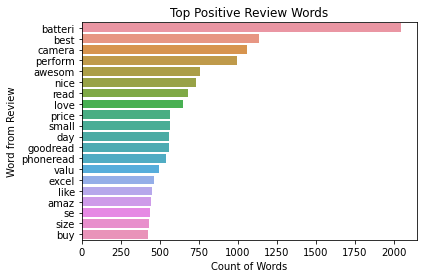

In [682]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of top positive review words

plt.figure()
sns.barplot(x=positive_df[:20, ].values, y=positive_df[:20, ].index)
plt.title('Top Positive Review Words')
plt.ylabel('Word from Review')
plt.xlabel('Count of Words')
plt.show()


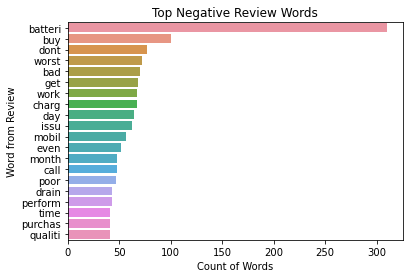

In [683]:
# Bar plot of top negative review words

plt.figure()
sns.barplot(x=negative_df[:20, ].values, y=negative_df[:20, ].index)
plt.title('Top Negative Review Words')
plt.ylabel('Word from Review')
plt.xlabel('Count of Words')
plt.show()


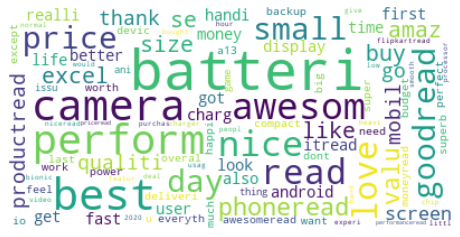

In [684]:
# Creating word cloud of Positive Review Words
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate_from_frequencies(positive_df)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Here we have a word cloud of the reviews with positive sentiment. We can see that the most talked about features are things like the battery, camera, size, etc.

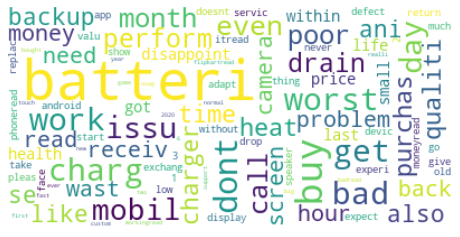

In [685]:
# Word cloud of negative review words
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate_from_frequencies(negative_df)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In the negative word cloud we can see that they mention things like the charger, screen, heat, etc.


## Conclusion

Through this exploratory data analysis we were able to answer all the questions that were posed in the beginning.

### What are the customers sentiment towards the iPhone SE?
- 86% of reviewers left a positive review, 5% neutral, 6% negative.

### What features are mentioned in comments with positve sentiment?
- Battery, charger, heat, and speaker.

### What features are mentioned in comments with negative sentiment?
- Battery, camera, how small it is, and how fast it is. 

The battery is mentioned a lot in both positive and negative reviews and it seems to be the main complaint in both. Improving the battery life of the phone would be a great way to improve sentiment towards the iPhone SE.

